In [1]:
import sys
sys.path.insert(0, '..\\..\\frxas.py')

import numpy as np
import h5py
import matplotlib.pyplot as plt
import lmfit
from lmfit import Parameters, minimize, report_fit

from frxas import hdf5_io
from frxas import models
from frxas import visualization

%reload_ext autoreload
%autoreload 2

In [2]:
f1 = hdf5_io.get_all_datasets('July18_frXAS_v2', start_indices = [[4, 2, 2], [4, 6, 0], [1, 2]])
hdf5_io.close_frxas_file('July18_frXAS_v2')

In [3]:
x, data, frequencies, gases = hdf5_io.unpack_data(f1, kind='data_adj')

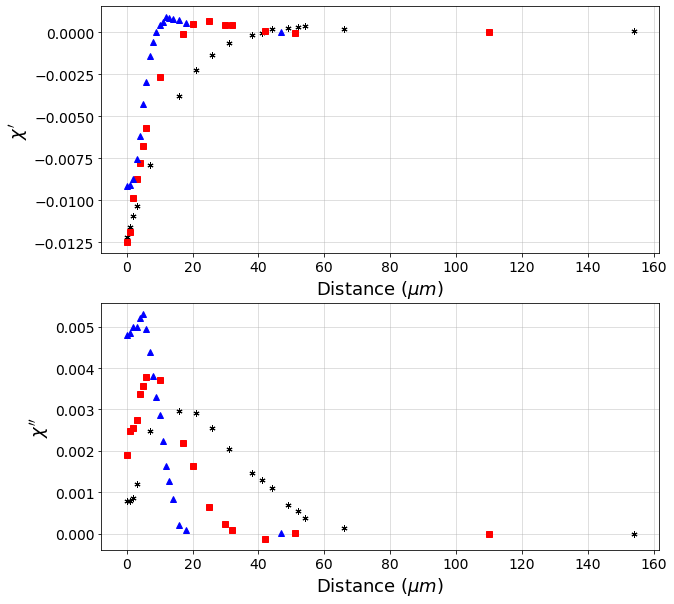

In [5]:
fig, axes = plt.subplots(nrows=2, figsize=(10,10))

axes = visualization.plot_chi(axes, x[:3], data[:3])
# axes[1].set_xlim((420, 460))
plt.show()

In [6]:
fit_params = Parameters()

for iy, y in enumerate(data):
    fit_params.add('ld_%i' % (iy+1), value=20, min=0.0, max=200)
    fit_params.add('tg_%i' % (iy+1), value=.5, min=0.01, max=100.0)
    fit_params.add('ao_%i' % (iy+1), value=1.5, min=1, max=4)
    fit_params.add('f_%i' % (iy+1), value=frequencies[iy], vary=False)

In [7]:
for iy in (2, 3):
    fit_params['ld_%i' % iy].expr = 'ld_1'
    fit_params['tg_%i' % iy].expr = 'tg_1'
    fit_params['ao_%i' % iy].expr = 'ao_1'

for iy in (5, 6):
    fit_params['ld_%i' % iy].expr = 'ld_4'
    fit_params['tg_%i' % iy].expr = 'tg_4'
    fit_params['ao_%i' % iy].expr = 'ao_4'


fit_params['ld_8'].expr = 'ld_7'
fit_params['tg_8'].expr = 'tg_7'
fit_params['ao_8'].expr = 'ao_7'

In [8]:
fit_params

name,value,initial value,min,max,vary,expression
ld_1,20.0000000,20,0.00000000,200.000000,True,
tg_1,0.50000000,0.5,0.01000000,100.000000,True,
ao_1,1.50000000,1.5,1.00000000,4.00000000,True,
f_1,0.25000000,0.25,-inf,inf,False,
ld_2,20.0000000,20,0.00000000,200.000000,False,ld_1
tg_2,0.50000000,0.5,0.01000000,100.000000,False,tg_1
ao_2,1.50000000,1.5,1.00000000,4.00000000,False,ao_1
f_2,1.00000000,1,-inf,inf,False,
ld_3,20.0000000,20,0.00000000,200.000000,False,ld_1
tg_3,0.50000000,0.5,0.01000000,100.000000,False,tg_1


In [9]:
out = minimize(models.objective_fun, fit_params, args=(x, data, models.chi_ideal))
report_fit(out.params)

[[Variables]]
    ld_1:  0.33405812 +/- 0.22355709 (66.92%) (init = 20)
    tg_1:  0.01313699 +/- 0.09434885 (718.19%) (init = 0.5)
    ao_1:  4.00000000 +/- 0.34091187 (8.52%) (init = 1.5)
    f_1:   0.25 (fixed)
    ld_2:  0.33405812 +/- 0.22355709 (66.92%) == 'ld_1'
    tg_2:  0.01313699 +/- 0.09434885 (718.19%) == 'tg_1'
    ao_2:  4.00000000 +/- 0.34091187 (8.52%) == 'ao_1'
    f_2:   1 (fixed)
    ld_3:  0.33405812 +/- 0.22355709 (66.92%) == 'ld_1'
    tg_3:  0.01313699 +/- 0.09434885 (718.19%) == 'tg_1'
    ao_3:  4.00000000 +/- 0.34091187 (8.52%) == 'ao_1'
    f_3:   4 (fixed)
    ld_4:  0.31794938 +/- 0.28304694 (89.02%) (init = 20)
    tg_4:  0.01576725 +/- 0.36868341 (2338.29%) (init = 0.5)
    ao_4:  4.00000000 +/- 0.36146865 (9.04%) (init = 1.5)
    f_4:   0.25 (fixed)
    ld_5:  0.31794938 +/- 0.28304694 (89.02%) == 'ld_4'
    tg_5:  0.01576725 +/- 0.36868342 (2338.29%) == 'tg_4'
    ao_5:  4.00000000 +/- 0.36146865 (9.04%) == 'ao_4'
    f_5:   1 (fixed)
    ld_6:  0.3179

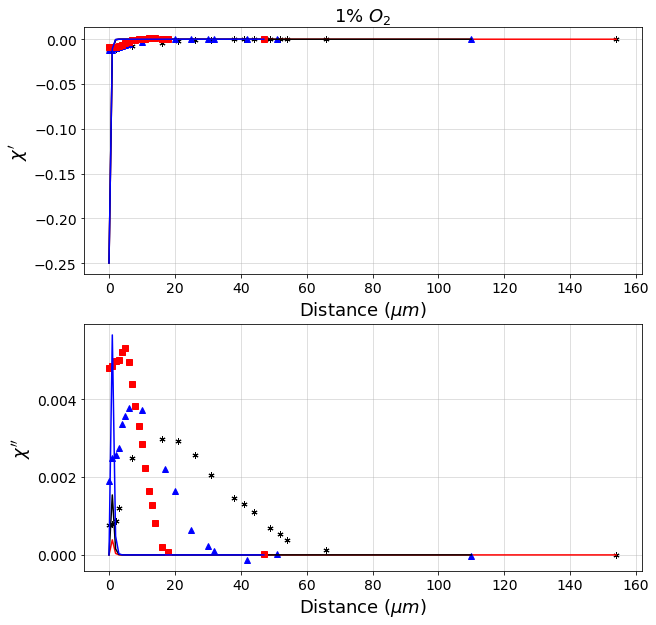

In [10]:
fig, axes = plt.subplots(nrows=2, figsize=(10,10))

for iy in np.arange(0,3):
    visualization.plot_chi(axes, x[iy], data[iy], ls='')
    visualization.plot_chi(axes, x[iy], models.dataset_fun(out.params, iy, x[iy], models.chi_ideal), marker='')
    
axes[0].set_title('1% $O_2$', fontsize=18)
plt.show()

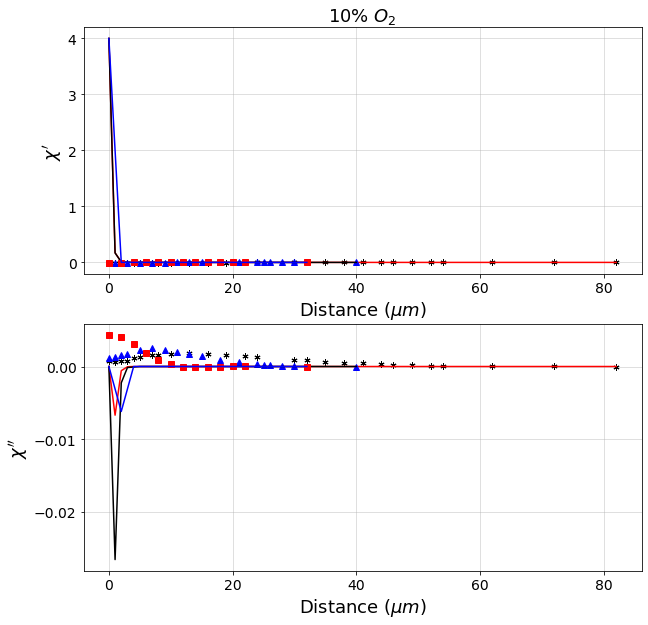

In [11]:
fig, axes = plt.subplots(nrows=2, figsize=(10,10))

for iy in np.arange(3,6):
    visualization.plot_chi(axes, x[iy], data[iy], ls='')
    visualization.plot_chi(axes, x[iy], models.dataset_fun(out.params, iy, x[iy], models.chi_amp), marker='')
    
axes[0].set_title('10% $O_2$', fontsize=18)
plt.show()

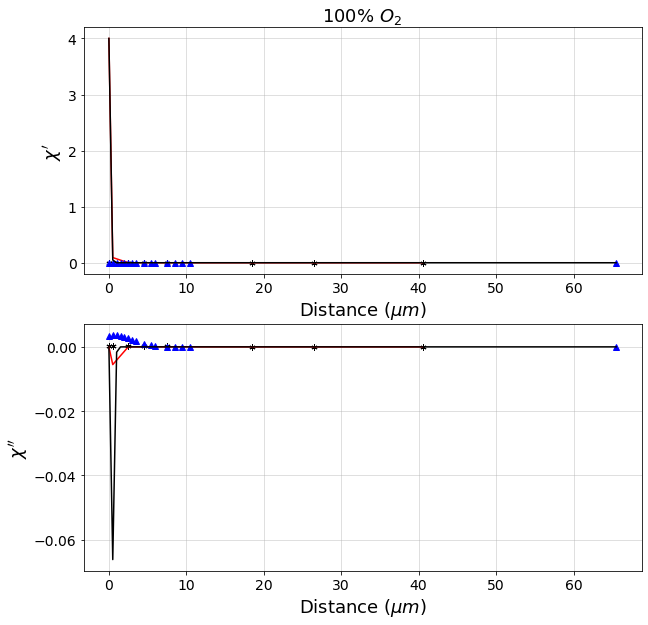

In [12]:
fig, axes = plt.subplots(nrows=2, figsize=(10,10))

for iy in np.arange(6,8):
    visualization.plot_chi(axes, x[iy], data[iy], ls='')
    visualization.plot_chi(axes, x[iy], models.dataset_fun(out.params, iy, x[iy], models.chi_amp), marker='')
    
axes[0].set_title('100% $O_2$', fontsize=18)
plt.show()

Data clearly not fitting to the purely ideal model. Seemingly occurs because the real data isn't scaled to 1 (max values for real components are ~0.002)